<a href="https://colab.research.google.com/github/chinnusai25/cvit-Workshop2020/blob/master/Day8(June3)(AfterNoonSession_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles
import seaborn as sns


In [0]:
def plot_clusters(points, cluster_labels, show_annotation=True):
  cluster_labels = np.array(cluster_labels)
  un_clusters=np.unique(cluster_labels)
  # print(un_clusters)

  if(len(points.shape)==1 or points.shape[1]==1):
    points = np.hstack((points.ravel()[:,None],np.zeros(points.shape[0])[:,None]))
  
  cluster_labels = np.array(cluster_labels)
  points = np.array(points)

  for cluster in un_clusters:
    if(cluster_labels==cluster).any():
      # print(points[cluster_labels==cluster,0],points[cluster_labels==cluster,1])
      plt.scatter(points[cluster_labels==cluster,0],points[cluster_labels==cluster,1],label=cluster)
  if(show_annotation):
    for i in range(points.shape[0]):
      plt.annotate(i,(points[i,0]+0.05,points[i,1]+0.05))  

  # plt.legend()
  plt.show()

In [0]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
 

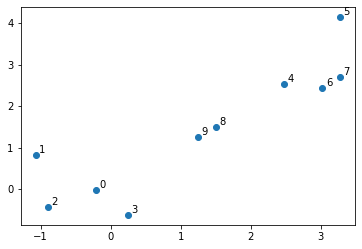

In [421]:
cluster_labels=np.zeros((10)).tolist()
offset = 0.05

plot_clusters(points,cluster_labels)
# plt.legend()
# plt.show()

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

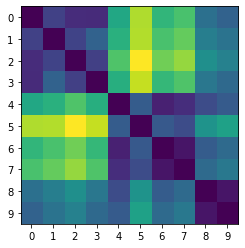

In [423]:
grid=euclidean_distances(points,points)
grid = (grid-grid.min(axis=1)[:,None]/(grid.max(axis=1)[:,None]-grid.min(axis=1)[:,None]))

xlabels = np.arange(0,points.shape[0])
ylabels = np.arange(0,points.shape[0])
heatmap(grid,xlabels,ylabels,xrot=0)

In [0]:
import random

def initialise(points, K):
  x = np.random.choice(range(len(points)), size=K, replace=False)
  return np.array([ points[i] for i in x ])

In [425]:
val=initialise(points,3)
print(val)

[[ 3.26952916  2.70192015]
 [ 3.0207697   2.44103728]
 [-0.89671779 -0.42087368]]


In [0]:
def assign(points,cluster_centers):
  # print(points)
  # print(euclidean_distances(points,cluster_centers)) #each column is a cluster center and each row is point
  return np.argmin(euclidean_distances(points,cluster_centers),axis=1) #axis=0 is vertical axis,axis=1 is horizontal axis


In [427]:
val1=assign(points,val)
print(val1)

[2 2 2 2 1 0 1 0 1 1]


In [0]:
def recalculate_cluster_centers(points,cluster_labels,K):
  cluster_centres=np.zeros((K,2))
  for i in range(K):
    cluster_centers[i,:]=points[cluster_labels==i,:].mean(axis=0)  
    return cluster_centers
    # print(points[cluster_labels==i,:])

In [0]:
def KMeans(points,K):
  cluster_labels = np.zeros(len(points))

  #initializing cluster points
  cluster_centers = initialise(points,K)
  initial_centers = cluster_centers.copy()
  old_cluster_centres = np.zeros(cluster_centers.shape)

  temp=old_cluster_centres==cluster_centers
  # print(temp[0].all()==True)
  while not (temp[0].all()==True and temp[1].all()==True):
    old_cluster_centres = cluster_centers.copy()

    #assigning lables to points based on current cluster_centers
    cluster_labels = assign(points,cluster_centers)

    #relocating cluster centres
    cluster_centers = recalculate_cluster_centers(points,cluster_labels,K)
    temp=(cluster_centers==cluster_centers)

  return cluster_labels,initial_centers,cluster_centers

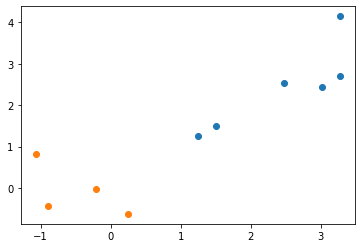

In [430]:
# recalculate_cluster_centers(val,val1,3)
np.random.seed(2)
cluster_centers = np.array([[0,0], [1,1], [2,2]])
# print(cluster_centers)
# print(points)
cluster_labels = assign(points, cluster_centers)
# print(cluster_labels)
recalculate_cluster_centers(points, cluster_labels, 3)

cluster_labels,initial_centers,cluster_centers = KMeans(points,K)
plot_clusters(points, cluster_labels, show_annotation=False)


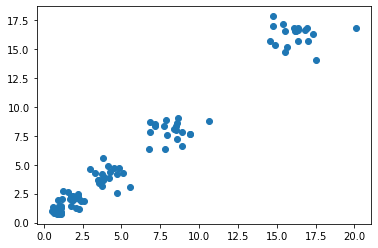

In [431]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

 

points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

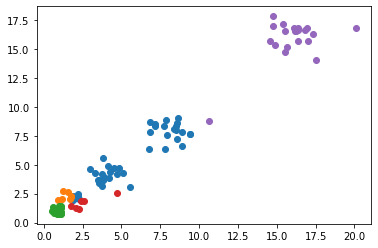

In [432]:
cluster_labels,initial_centers,cluster_centers = KMeans(points,K)
plot_clusters(points, cluster_labels, show_annotation=False)


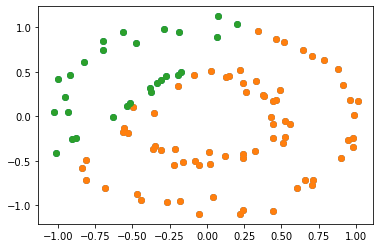

In [433]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])

cluster_labels,initial_centers,cluster_centers = KMeans(points,2)
plot_clusters(points, cluster_labels, show_annotation=False)


Task1: Run the kmeans multiple times and see if averaging the cluster centers across runs
helps to reduce dependency on initialisation. Here the assumption is that good clustering is
more likely than bad one. Dataset: The 5 clusters

In [0]:
def KMeansAvg(points, K, initial):
  cluster_labels = np.zeros((points.shape[0]))
  cluster_centers = initial
  initial_centers = cluster_centers.copy()
  old_cluster_centers = np.zeros(cluster_centers.shape)
  while not (old_cluster_centers == cluster_centers).all():
    old_cluster_centers = cluster_centers.copy()

    cluster_labels = assign(points, cluster_centers)

    cluster_centers = recalculate_cluster_centers(points, cluster_labels, K)
    return cluster_labels, initial_centers, cluster_centers

In [0]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

points = np.vstack(X)

Iteration: 1


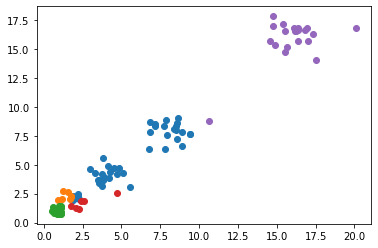

Iteration: 2


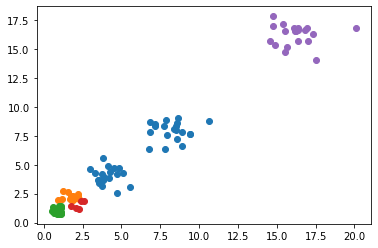

Iteration: 3


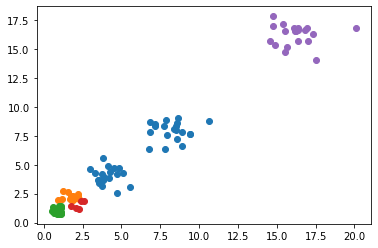

Iteration: 4


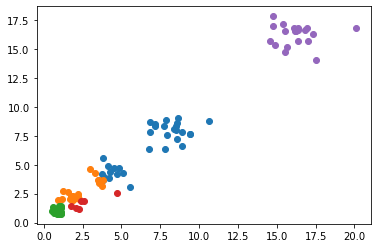

Iteration: 5


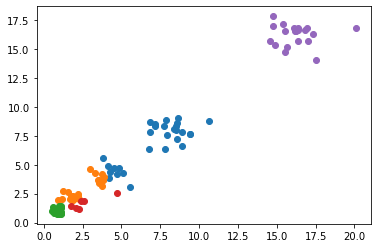

Iteration: 6


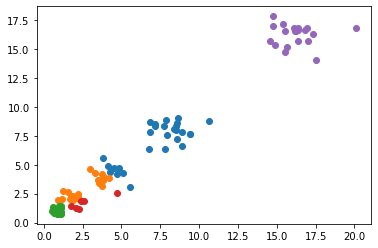

Iteration: 7


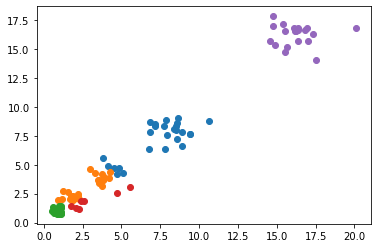

Iteration: 8


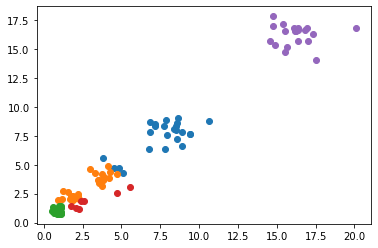

Iteration: 9


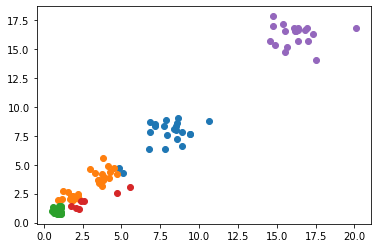

Iteration: 10


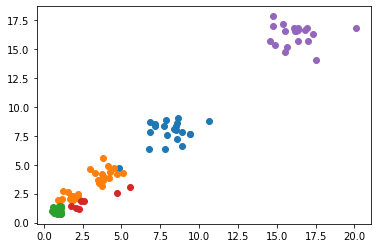

In [436]:
# points, _ = make_circles(100, noise=0.06, factor=0.5)
# plt.scatter(points[:,0], points[:,1])
initial_centers = initialise(points,K)
cluster_centers = initial_centers.copy()


for iteration in range(10):
  print("Iteration: " + str(iteration + 1))
  cluster_labels, initial_centers, cluster_centers = KMeansAvg(points, K, (initial_centers + cluster_centers) / 2)
  plot_clusters(points, cluster_labels, show_annotation=False)


Task2: Run the algorithm on concentric circles dataset in r-theta space or some other space
you like.

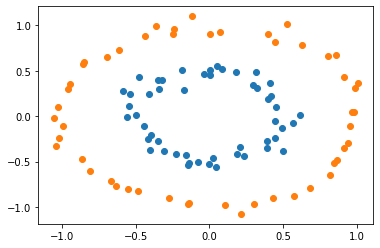

In [459]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
K=2
r = np.sqrt(points[:,0]**2+points[:,1]**2)
t = np.arctan2(points[:,1],points[:,0])
# print(r.shape)
# print(t.shape)
newpoints=np.zeros((points.shape[0],2))
for i in range(points.shape[0]):
  newpoints[i][1]=float(r[i]/1.1)
  newpoints[i][0]=float((-t[i]+3.14)/(2*3.14))
# points=newpoints
# print(points)
# plt.scatter(points[:,0], points[:,1])
cluster_labels,initial_centers,cluster_centers = KMeans(newpoints,2)
plot_clusters(points, cluster_labels, show_annotation=False)

Task3: Recommender system (Do the dataset creation by 7)
You need to install pandas and use python3
1. Download and run the script.py file and the tmdb_5000_movies.csv file from the link
below and put them in the same folder.
2. Run script.py using python3 in the same folder as the tmdb_5000_movies.csv.
3. Select a movie preference out of the 5 that are shown. Do this till you have 30 movies at
least.
4. A final.json file will be generated in the folder from which you ran script.py
a. Rename final.json to final_<yourname>.json
b. Put this file in the Final Datasets folder in the link below
5. Download the data after 7PM today and try clustering based on various movie
preferences.
<br>
Link for files: https://drive.google.com/drive/folders/1PICo3WedKSMhYvqTmrTOqvsbMedDcV29

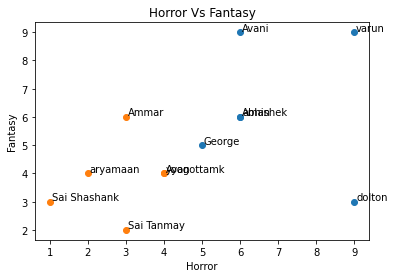

In [442]:
# import json
# import pandas as pd
# Shashank = json.load(open('/content/.json'))

import json,os

# f = open("final_Ammar.json", "r")
data=[]
X=[]
Y=[]
points = []
names=[]
count=0
for i in os.listdir("/content"):
  if(i[0:5]=='final'):
    f=open(i,"r")
    data.append(json.loads(f.read()))
    # print(data[count])
    X.append(data[count]['genre_freq']['Horror'])
    Y.append(data[count]['genre_freq']['Fantasy'])
    points.append([X[count],Y[count]])
    names.append(data[count]['username'])
    f.close()
    count+=1

points = np.array(points)
# print(points)
K=2
initial_centers = initialise(points,K)
cluster_centers = initial_centers.copy()

cluster_labels, initial_centers, cluster_centers = KMeans(points, K)
for i in range(points.shape[0]):
  plt.annotate(names[i],(points[i,0]+0.05,points[i,1]+0.05))  
plt.title("Horror Vs Fantasy")
plt.xlabel("Horror")
plt.ylabel("Fantasy")
plot_clusters(points, cluster_labels, show_annotation=False)


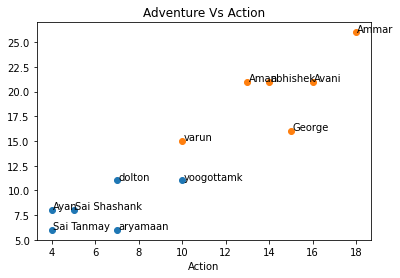

In [441]:
import json,os

data=[]
X=[]
Y=[]
points = []
names=[]
count=0
for i in os.listdir("/content"):
  if(i[0:5]=='final'):
    f=open(i,"r")
    data.append(json.loads(f.read()))
    # print(data[count])
    X.append(data[count]['genre_freq']['Adventure'])
    Y.append(data[count]['genre_freq']['Action'])
    points.append([X[count],Y[count]])
    names.append(data[count]['username'])
    f.close()
    count+=1

points = np.array(points)
# print(points)
K=2
initial_centers = initialise(points,K)
cluster_centers = initial_centers.copy()

cluster_labels, initial_centers, cluster_centers = KMeans(points, K)
for i in range(points.shape[0]):
  plt.annotate(names[i],(points[i,0]+0.05,points[i,1]+0.05))  
plt.title("Adventure Vs Action")
plt.xlabel("Adventure")
plt.xlabel("Action")
plot_clusters(points, cluster_labels, show_annotation=False)
